Mount Google Drive

In [1]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/detectron2_tutorial

/content/gdrive/My Drive/detectron2_tutorial


**Install required libraries**

In [4]:
!pip show pyyaml  

Name: PyYAML
Version: 3.13
Summary: YAML parser and emitter for Python
Home-page: http://pyyaml.org/wiki/PyYAML
Author: Kirill Simonov
Author-email: xi@resolvent.net
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: PyDrive, fastai, distributed, coveralls, bokeh


In [5]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [7]:
!nvcc --version #10.1
!python --version # 3.7.6

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Python 3.7.13


In [8]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 False


In [9]:
!git clone https://github.com/facebookresearch/detectron2.git


Cloning into 'detectron2'...
remote: Enumerating objects: 14060, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14060 (delta 4), reused 8 (delta 2), pack-reused 14046
Receiving objects: 100% (14060/14060), 5.77 MiB | 3.80 MiB/s, done.
Resolving deltas: 100% (10166/10166), done.
Checking out files: 100% (773/773), done.


In [10]:
%cd detectron2

/content/gdrive/MyDrive/detectron2_tutorial/detectron2


In [12]:
!pip install fvcore


     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 10.0 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=95138a162a026023185924a088bf069758dc05fdadca63037ed96fb5f1762e2c
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
!pip install omegaconf

     |████████████████████████████████| 74 kB 1.5 MB/s 
     |████████████████████████████████| 112 kB 11.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=35cee8651a32d3d6c23cdf4c8a21f5596bc72cd352c633333595cb5a31087661
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [15]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

In [19]:
!pwd

/content/gdrive/MyDrive/detectron2_tutorial/detectron2


**OBJECT DETECTION WITH DETECTRON2**

In [18]:
# get image
im = cv2.imread("../image_000000001.jpg")

In [21]:
# im

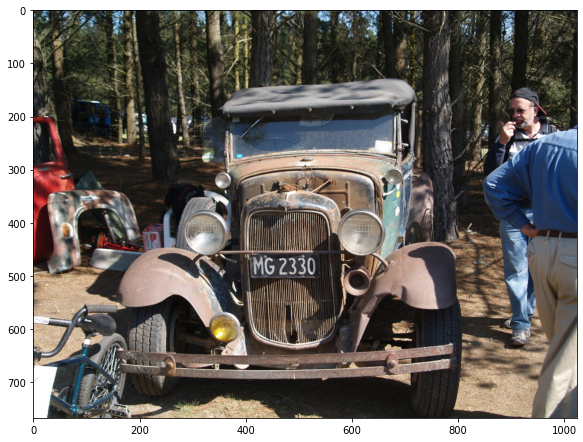

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1]) #bgr to rgb

In [23]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

In [24]:
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

model_final_f6e8b1.pkl: 243MB [00:06, 39.2MB/s]                           


In [26]:
outputs = predictor(im)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [27]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  1,  7, 19,  0,  2])
Boxes(tensor([[ 846.8853,  180.3909, 1023.8821,  756.2508],
        [   2.4974,  552.6131,  183.8108,  763.4796],
        [  89.6792,  114.5234,  797.4252,  739.0025],
        [ 693.1639,  302.9113,  757.3743,  447.6631],
        [ 849.3849,  143.8496,  989.9778,  301.3763],
        [   0.0000,  198.2783,   78.5241,  480.2204]]))


<Figure size 720x360 with 0 Axes>

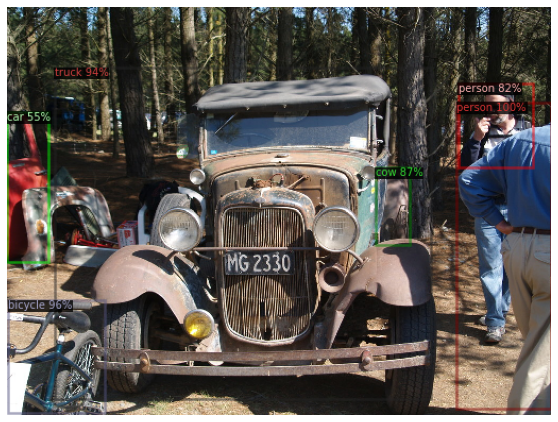

In [35]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])

In [37]:
# check on another image
im = cv2.imread("../image_000000094.jpg")

In [38]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

In [39]:
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

In [40]:
outputs = predictor(im)

In [41]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 24,  2,  2, 28,  7,  2, 24])
Boxes(tensor([[ 271.2794,   76.9554,  728.7952,  673.0866],
        [ 410.5703,  307.7959,  712.7223,  676.5865],
        [   0.0000,    0.0000,  727.5637,  619.5543],
        [   0.0000,    0.0000,  678.0573,  213.7555],
        [ 706.2181,  422.1722,  873.3326,  627.5693],
        [ 587.0425,   34.4042, 1024.0000,  659.8915],
        [ 581.3415,   32.3567, 1017.1537,  659.7032],
        [ 603.0120,  302.5771,  869.8054,  678.3124]]))


<Figure size 720x360 with 0 Axes>

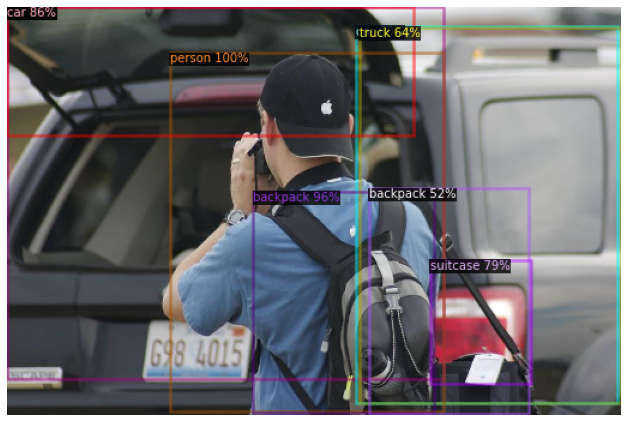

In [42]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])

In [43]:
# check on another image
im = cv2.imread("../image_000000114.jpg")

In [44]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

In [45]:
# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

In [46]:
outputs = predictor(im)

In [47]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  2,  2, 24,  2,  0,  0,  0,
        25,  0, 28,  0,  0,  2,  2,  0])
Boxes(tensor([[9.8428e-01, 1.6837e+02, 8.2578e+01, 3.9541e+02],
        [5.9720e+02, 1.3447e+02, 6.7861e+02, 3.0419e+02],
        [2.3282e+02, 1.5556e+02, 2.7214e+02, 2.2040e+02],
        [8.3902e+02, 1.5669e+02, 9.1034e+02, 3.4255e+02],
        [2.3385e+01, 1.9008e+02, 2.3216e+02, 2.9922e+02],
        [9.8915e+01, 1.8993e+02, 9.2935e+02, 6.1226e+02],
        [9.1160e+02, 1.6849e+02, 9.4544e+02, 2.4055e+02],
        [7.3879e+02, 1.5958e+02, 8.2939e+02, 3.2399e+02],
        [9.4374e+02, 1.6239e+02, 9.7359e+02, 2.3913e+02],
        [6.9342e+02, 1.6196e+02, 7.4233e+02, 2.4395e+02],
        [6.6285e+02, 1.5873e+02, 6.9783e+02, 2.4137e+02],
        [3.4660e+02, 1.7513e+02, 6.1218e+02, 2.5416e+02],
        [8.7340e+02, 1.6563e+02, 1.0031e+03, 2.1611e+02],
        [9.8237e+02, 1.8049e+02, 1.0012e+03, 2.0908e+02],
        [9.7670e+02, 2.4322e+02, 1.0238e+03, 3.4643e+02],
   

<Figure size 720x360 with 0 Axes>

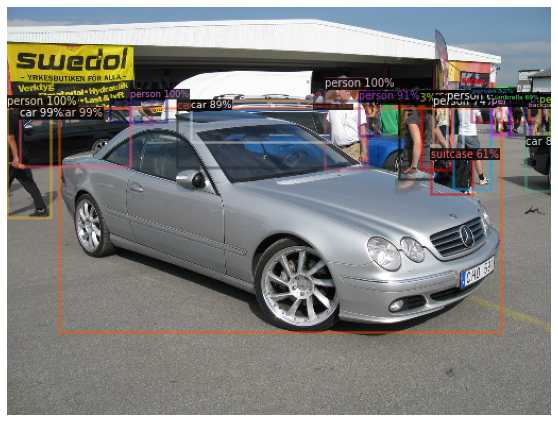

In [48]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])

In [54]:
# check on another image
im = cv2.imread("../image_000000142.jpg")

In [55]:
# Create config
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

# Create predictor

# If getting AssertionError: Torch not compiled with CUDA enabled detectron2. Then do the below given line
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

In [56]:
outputs = predictor(im)

In [57]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0, 2, 2, 0, 0, 7, 0, 7, 0])
Boxes(tensor([[  67.0615,  135.0850,  121.6497,  241.9014],
        [ 709.6005,  164.8941, 1021.2162,  436.2450],
        [ 685.5369,  160.2584,  847.1216,  225.6459],
        [ 383.1600,  165.6932,  432.6035,  226.5524],
        [ 229.7433,  103.7755,  264.8820,  143.1398],
        [  46.2911,  129.5170, 1012.7021,  635.0400],
        [ 149.2159,   88.2142,  196.9182,  186.6924],
        [ 560.8643,  129.2292,  691.5777,  210.6787],
        [ 553.6324,  176.1709,  599.7605,  223.8444]]))


<Figure size 720x360 with 0 Axes>

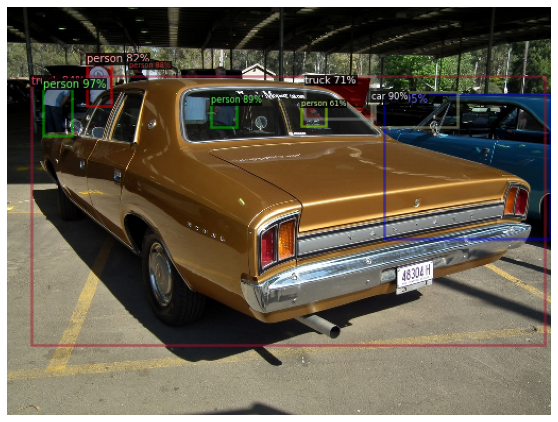

In [58]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])